In [107]:
import pathlib

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from transforms import transforms

IMG_DIR = pathlib.Path("images/")

In [108]:
def get_extents(a, b, num_rows, num_cols):
    r1 = 0
    c1 = int(a * r1 + b)
    r2 = int(num_rows - 1)
    c2 = int(a * r2 + b)
    return (c1, r1), (c2, r2)

In [109]:
def hough_lines(img):
    angles = np.deg2rad(np.arange(360))
    num_rows, num_cols = img.shape[0], img.shape[1]
    d_max = int((num_rows**2 + num_cols**2) ** 0.5)
    hough_matrix = np.zeros((d_max, len(angles)))
    ids = np.argwhere(img)
    r, c = ids[:, 0], ids[:, 1]

    for i in range(len(r)):
        for theta in angles:
            di = int(r[i] * np.cos(theta) + c[i] * np.sin(theta))
            if 0 < di < d_max:
                hough_matrix[di, int(np.rad2deg(theta))] += 1
                
    return hough_matrix

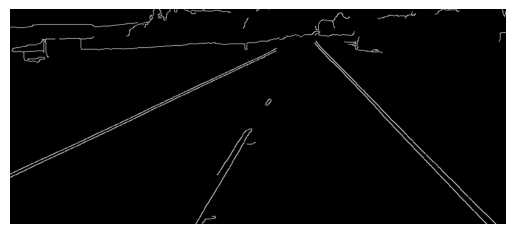

In [110]:
img = cv2.imread(str(IMG_DIR / "road.png"), cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [111]:
img.min(), img.max(), img.dtype, img.shape

(0, 255, dtype('uint8'), (499, 1153))

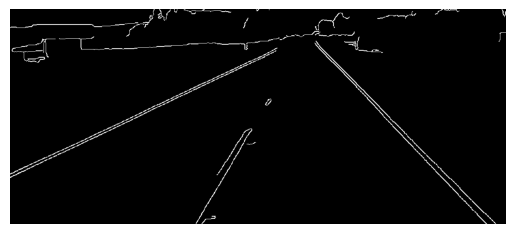

In [112]:
img = img > 100  # type: ignore
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [113]:
hough_matrix = hough_lines(img)
hough_matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [51.,  0.,  0., ..., 19., 26., 25.],
       [54.,  0.,  0., ..., 23., 18., 25.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [114]:
ids = np.argwhere(hough_matrix == hough_matrix.max())
best_d, best_theta = ids[0, 0], ids[0, 1]
best_d, best_theta

(346, 25)

In [115]:
theta = np.deg2rad(best_theta)
a = -np.cos(theta) / np.sin(theta)
b = best_d / np.sin(theta)
a, b

(-2.1445069205095586, 818.7057477707644)

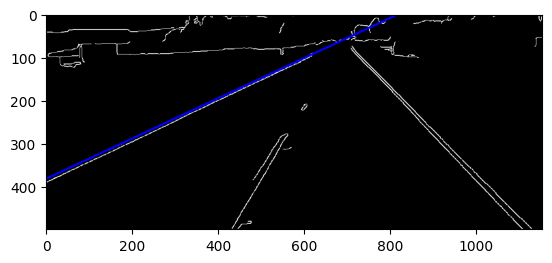

In [116]:
s, e = get_extents(a, b, img.shape[0], img.shape[1])
img2 = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
img3 = np.array(255*img, dtype=np.uint8)
img2[..., 0] = img3
img2[..., 1] = img3
img2[..., 2] = img3
I = cv2.line(img2, s, e, (255, 0, 0), 3)
plt.imshow(I[..., ::-1])
plt.show()

In [117]:
def n_largest_ids(array, n):
    uniques = np.unique(array)
    threshold=  uniques[-n]
    return np.where(array >= threshold)

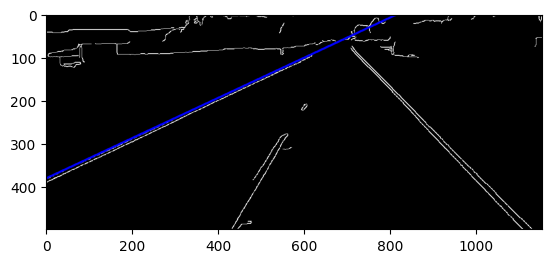

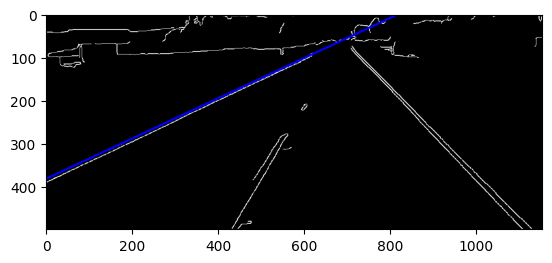

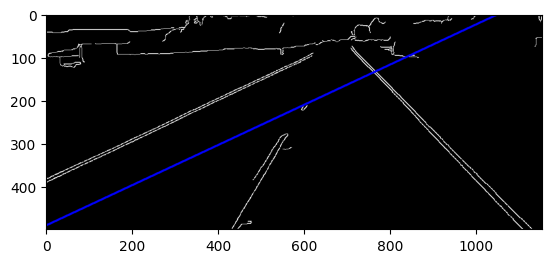

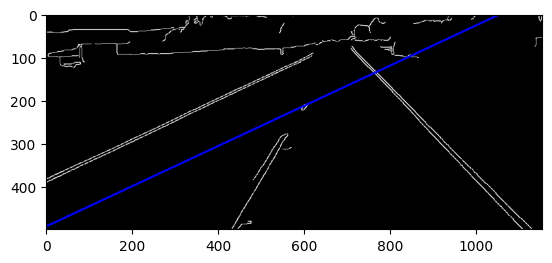

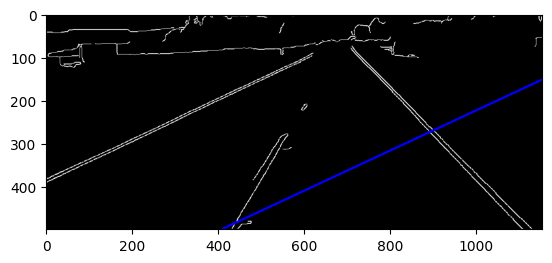

In [118]:
n = 5
x, y = n_largest_ids(hough_matrix, n)

for i in range(n):
    best_d, best_theta = x[i], np.deg2rad(y[i])
    a = -np.cos(theta) / np.sin(theta)
    b = best_d / np.sin(theta)

    s, e = get_extents(a, b, img.shape[0], img.shape[1])
    img2 = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    img3 = np.array(255 * img, dtype=np.uint8)
    img2[..., 0] = img3
    img2[..., 1] = img3
    img2[..., 2] = img3

    I = cv2.line(img2, s, e, (255, 0, 0), 3)
    plt.imshow(I[..., ::-1])
    plt.show()

In [119]:
def hough_circles(img):
    num_rows, num_cols = img.shape[0], img.shape[1]
    d_max = int((num_rows**2 + num_cols**2) ** 0.5)
    hough_matrix = np.zeros((num_rows, num_cols, d_max))
    ids = np.argwhere(img)
    r, c = ids[:, 0], ids[:, 1]

    for i in range(len(r)):
        for a in range(num_rows):
            for b in range(num_cols):
                ri, ci = r[i], c[i]
                di = int(((ri - a) ** 2 + (ci - b) ** 2) ** 0.5)
                if 0 < di < d_max:
                    hough_matrix[a, b, di] += 1

    return hough_matrix

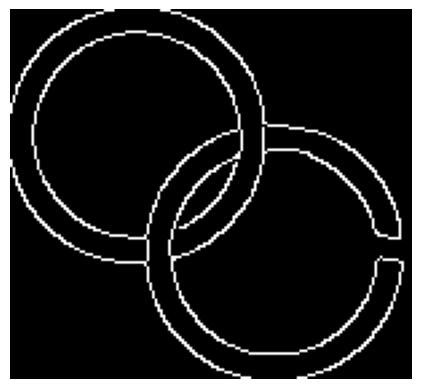

In [120]:
img = cv2.imread(str(IMG_DIR / "circles.png"), cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [121]:
img = img > 100  # type: ignore
hough_matrix = hough_circles(img)


In [124]:
ids = np.argwhere(hough_matrix == hough_matrix.max())
best_cr, best_cc,best_d = ids[0, 0], ids[0, 1], ids[0, 2]
best_cr, best_cc,best_d

(90, 98, 38)

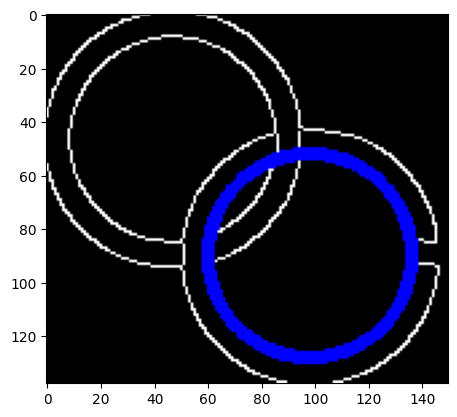

In [127]:
img2 = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
img3 = np.array(255 * img, dtype=np.uint8)
img2[..., 0] = img3
img2[..., 1] = img3
img2[..., 2] = img3
I = cv2.circle(img2, (int(best_cc), int(best_cr)), int(best_d), (255, 0, 0), 3)
plt.imshow(I[..., ::-1])
plt.show()